In [24]:
#import libraries

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, LassoCV
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
url = "https://raw.githubusercontent.com/rashida048/Datasets/master/cars.csv"

In [25]:
data_raw = read_csv(url)
y_col = 'COMB (kWh/100 km)'
x_col = 'Size (kW)'
data_raw.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [26]:
#drop columns that are not important to us
columns = ['Unnamed: 5', 'TYPE', '(g/km)', 'RATING', 'TIME (h)']
data = data_raw.drop(columns, axis = 1)
data.skew()

YEAR                -0.572928
(kW)                 0.939392
CITY (kWh/100 km)    0.201837
HWY (kWh/100 km)    -0.493752
COMB (kWh/100 km)    0.145207
CITY (Le/100 km)     0.249986
HWY (Le/100 km)     -0.455123
COMB (Le/100 km)     0.061787
(km)                 0.394793
dtype: float64

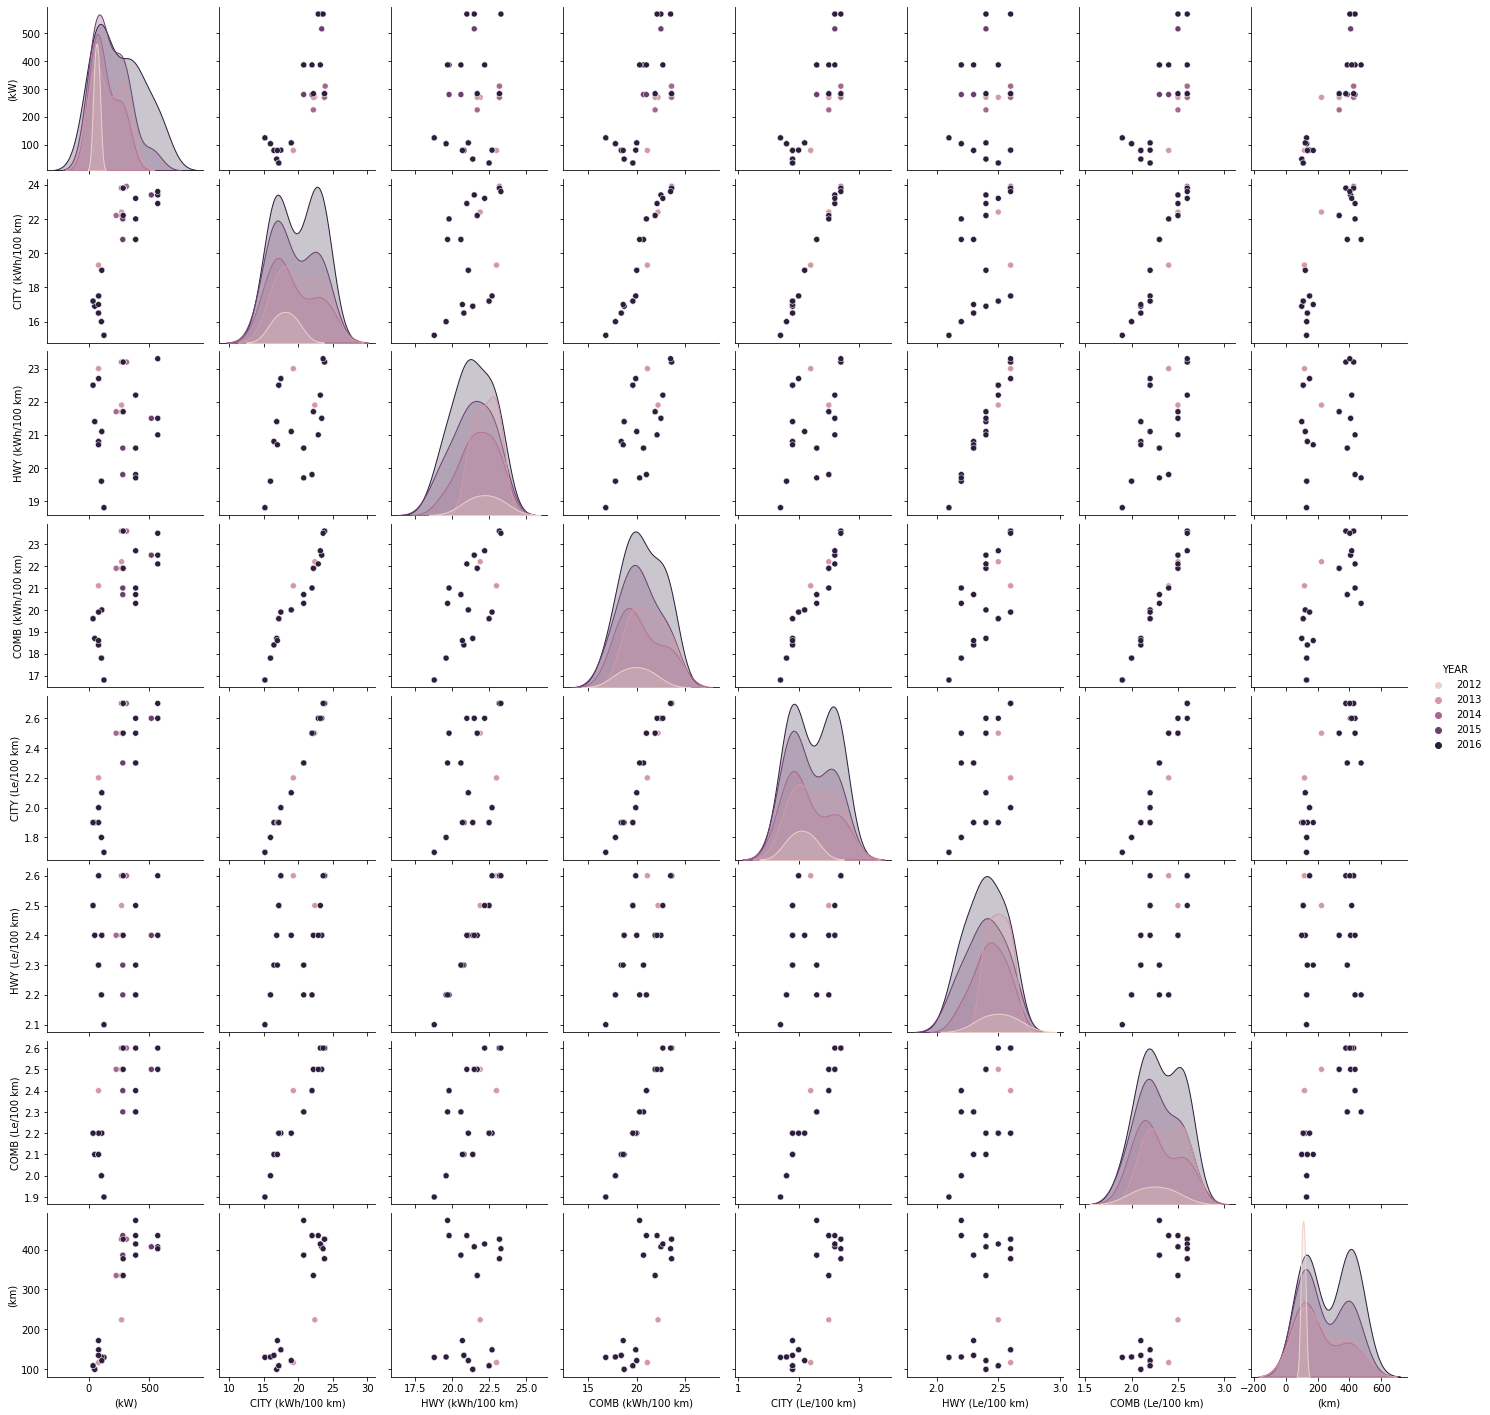

In [27]:
sns.pairplot(data, hue = 'YEAR' )

# Regression analysis on data
I will present different regression sets on two columns with data. Columns will be set in before with x_value and y_vlaue, and if you wish to play with the regression analysis, please, just set new variables.

## Linear regression

Text(0.5, 1.0, 'Some random dependancy')

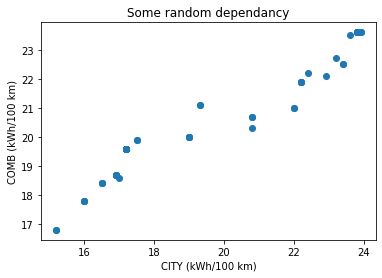

In [29]:
##### change here if you are curious about different data#########################
y_col = 'COMB (kWh/100 km)'; y= np.array(data[y_col])
x_col = 'CITY (kWh/100 km)' ; x = np.array([data[x_col]]).reshape((-1,1))
##############################################################
plt.figure()
plt.scatter(x, y)
plt.xlabel(str(x_col))
plt.ylabel(str(y_col))
plt.title('Some random dependancy')

In [31]:
lr = LinearRegression()
model = lr.fit(x,y)
r_sq = model.score(x,y)
print('R_squared: ' + str(r_sq))
inter = model.intercept_
print('intercept: ' +  str(inter))
slope = model.coef_
print('slope: ' + str(slope[0]))

print ('Equation: y = %sx + %s' % (inter, slope[0]))

R_squared: 0.9317228348884736
intercept: 8.03249506255707
slope: 0.636682763549866
Equation: y = 0.636682763549866x + 8.03249506255707


Text(0.5, 1.0, 'Some random dependancy')

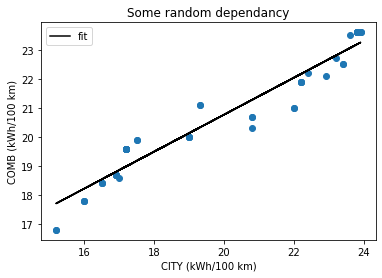

In [32]:
plt.figure('a')
plt.scatter(x, y)
plt.plot(x, model.predict(x), c = 'black', label = 'fit')
plt.xlabel(str(x_col))
plt.ylabel(str(y_col))
plt.legend()
plt.title('Some random dependancy')

use the model for new data prediction

Text(0.5, 0, 'COMB (kWh/100 km)')

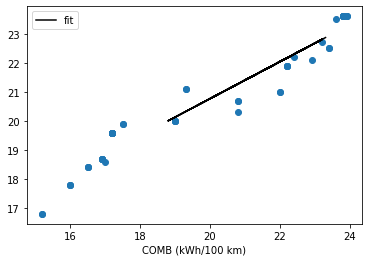

In [33]:
new = 'HWY (kWh/100 km)'
x_new = data[new].values.reshape(-1,1)
y_new = model.predict(x_new)
plt.figure('new data')
plt.scatter(x,y)
plt.plot(x_new, y_new, color = 'black', label = 'fit')
plt.legend()
plt.xlabel(str(x))
plt.xlabel(str(y_col))

## Polynomial Regression
First we gonna use PolynomialFeatures with LinearRegression and present some overfitting and underfitting. Next step will be Lasso and Ridge regressions with same data. 

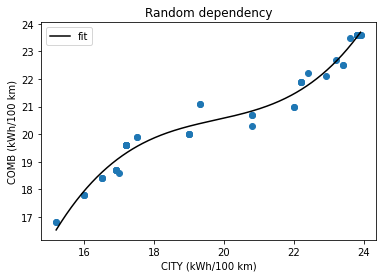

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
p = make_pipeline(PolynomialFeatures(3), LinearRegression())
p.fit(x,y)
X_seq = np.linspace(x.min(),x.max(),300).reshape(-1,1)
plt.figure()
plt.scatter(x,y)
plt.plot(X_seq,p.predict(X_seq), c = 'black', label = 'fit')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Random dependency')
plt.legend()

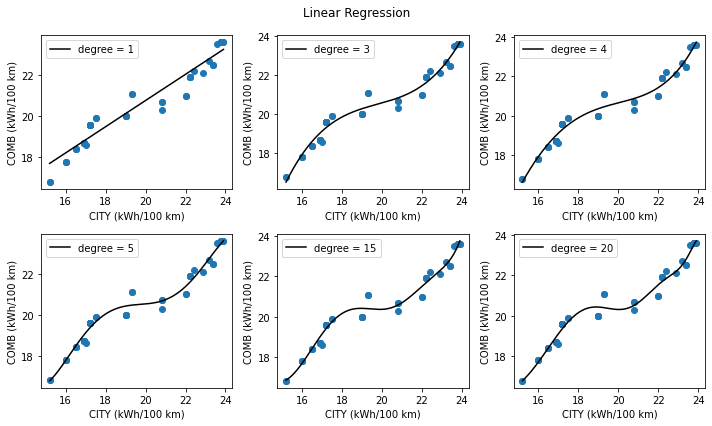

In [35]:
degrees = [1,3,4,5,15,20] 
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.ravel()
c = 0
for i, j in zip(degrees, range(0, len(degrees))): 
    p = make_pipeline(PolynomialFeatures(i), LinearRegression())
    p.fit(x,y)
    axs[j].scatter(x,y)
    axs[j].plot(X_seq,p.predict(X_seq), c = 'black', label = 'degree = %s' %(i))
    axs[j].set_xlabel(x_col)
    axs[j].set_ylabel(y_col)
    axs[j].legend()
fig.suptitle('Linear Regression')
fig.tight_layout()

 We see a bit of overifitting starting to form after the degree 4. Linear regression isn't so senstive about the degrees in the fit. Let's check out others!
 
 ## Ridge regression

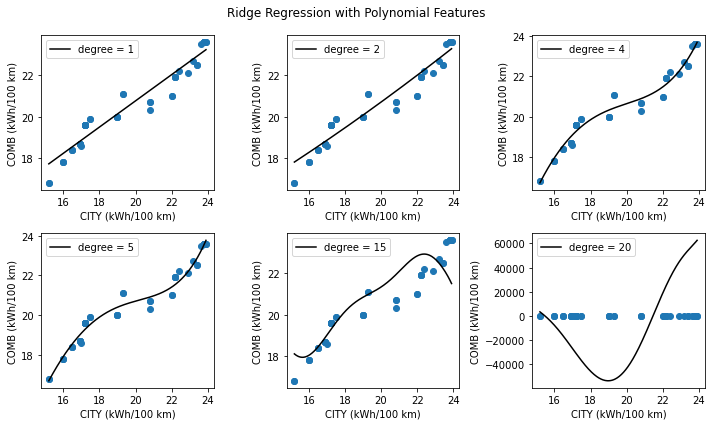

In [36]:
degrees = [1,2,4,5,15,20] 
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.ravel()
for i, j in zip(degrees, range(0, len(degrees))): 
    p = make_pipeline(PolynomialFeatures(i), Ridge())
    p.fit(x,y)
    axs[j].scatter(x,y)
    axs[j].plot(X_seq,p.predict(X_seq), c = 'black', label = 'degree = %s' %(i))
    axs[j].set_xlabel(x_col)
    axs[j].set_ylabel(y_col)
    axs[j].legend()
fig.suptitle('Ridge Regression with Polynomial Features')
fig.tight_layout()

We see that degree 5 already describes the data perfectly, whils 15 and 20 are nice example of overfitting. 

## Lasso Regression

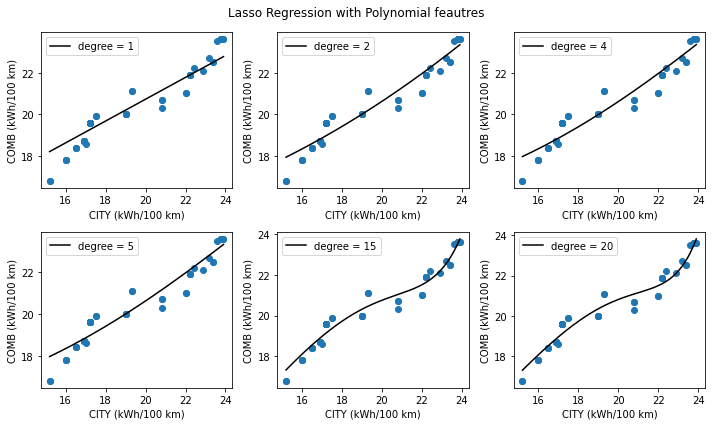

In [38]:
degrees = [1,2,4,5,15,20] 
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.ravel()
for i, j in zip(degrees, range(0, len(degrees))): 
    p = make_pipeline(PolynomialFeatures(i), Lasso())
    p.fit(x,y)
    axs[j].scatter(x,y)
    axs[j].plot(X_seq,p.predict(X_seq), c = 'black', label = 'degree = %s' %(i))
    axs[j].set_xlabel(x_col)
    axs[j].set_ylabel(y_col)
    axs[j].legend()
fig.suptitle('Lasso Regression with Polynomial feautres')
fig.tight_layout()

We see that Lasso Regression is less sensitive about the degrees and degree 15 and 20 present the nicest plot to our data. 
If you enjoyed about this work and are curious for more, just pls experiment with different variables.

0.6364109742847086
8.03783495240251
Equation : y = 0.6364109742847086x + 8.03783495240251


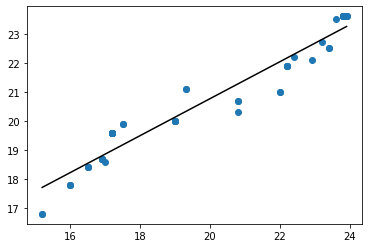

In [39]:
r = Ridge(alpha=0.2, normalize=False, fit_intercept=True)
r.fit(x, y)
y_pred = r.predict(X_seq)
plt.figure()
plt.scatter(x,y)
plt.plot(X_seq, y_pred, color = 'black')
print(r.coef_[0])
print(r.intercept_)
print('Equation : y = %sx + %s' %(r.coef_[0], r.intercept_))

I am gonna show different alpha values, that the reader could see how alpha effects the regression

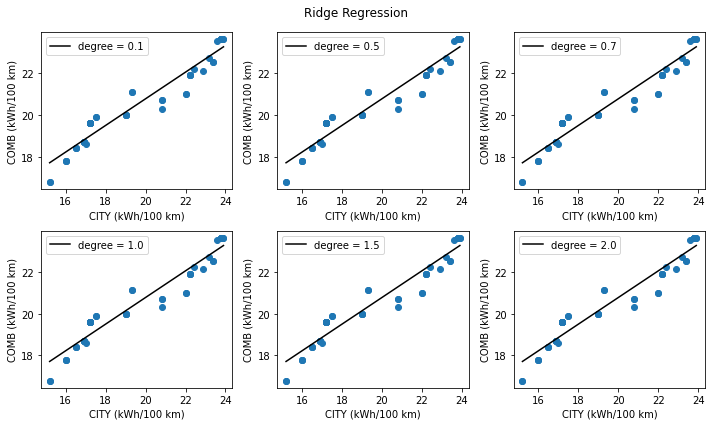

In [40]:
alpha = [0.1, 0.5, 0.7, 1.0, 1.5, 2.0]
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.ravel()
for i, j in zip(alpha, range(0, len(alpha))): 
    r = Ridge(alpha=1, normalize=False, fit_intercept=True)
    r.fit(x, y)
    axs[j].scatter(x,y)
    axs[j].plot(X_seq,r.predict(X_seq), c = 'black', label = 'degree = %s' %(i))
    axs[j].set_xlabel(x_col)
    axs[j].set_ylabel(y_col)
    axs[j].legend()
fig.suptitle('Ridge Regression')
fig.tight_layout()


We see that different alpha does not effect our fit. Which is good!

## Lasso Regression

0.6353261337147827
8.059148999298055
Equation : y = 0.6353261337147827x + 8.059148999298055


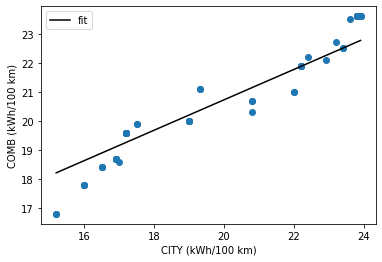

In [41]:
l = Lasso(alpha=1, normalize=False, fit_intercept=True)
l.fit(x, y)
y_pred = l.predict(X_seq)
plt.figure()
plt.scatter(x,y)
plt.plot(X_seq, y_pred, color = 'black', label = 'fit')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()
print(r.coef_[0])
print(r.intercept_)
print('Equation : y = %sx + %s' %(r.coef_[0], r.intercept_))

We see that slope and intercept are slightly different, but not so much different that it would be significant. Lets check different alpha values for Lasso!

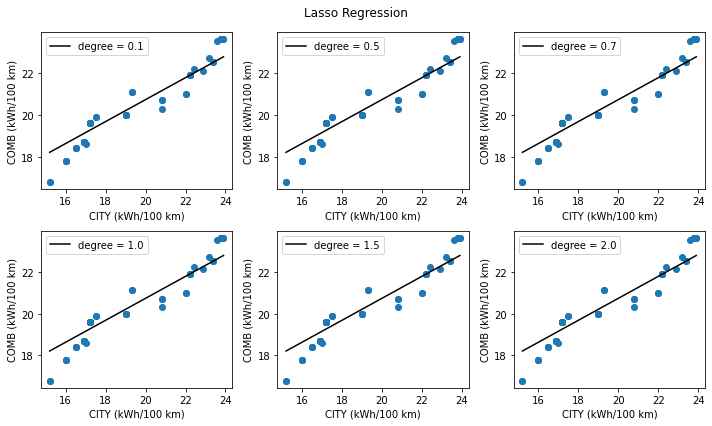

In [42]:
alpha = [0.1, 0.5, 0.7, 1.0, 1.5, 2.0]
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.ravel()
for i, j in zip(alpha, range(0, len(alpha))): 
    l = Lasso(alpha=1, normalize=False, fit_intercept=True)
    l.fit(x, y)
    axs[j].scatter(x,y)
    axs[j].plot(X_seq,l.predict(X_seq), c = 'black', label = 'degree = %s' %(i))
    axs[j].set_xlabel(x_col)
    axs[j].set_ylabel(y_col)
    axs[j].legend()
fig.suptitle('Lasso Regression')
fig.tight_layout()

As expected be basically get the same outputs as for Ridge regression. But what about LassoCV
## LassoCV

alpha :  0.02546278436624099
0.5743216181055563
9.257715076729895
Equation: y = 0.5743216181055563x + 9.257715076729895


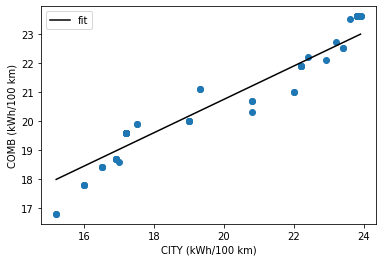

In [43]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(n_alphas=1000, normalize=True, random_state=1, cv= 2)
lcv.fit(x, y)
print('alpha : ',lcv.alpha_)
print(lcv.coef_[0])
print(lcv.intercept_)
print('Equation: y = %sx + %s' %(lcv.coef_[0], lcv.intercept_))
plt.figure()
plt.scatter(x,y)
plt.plot(X_seq, lcv.predict(X_seq), color = 'black', label = 'fit')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()

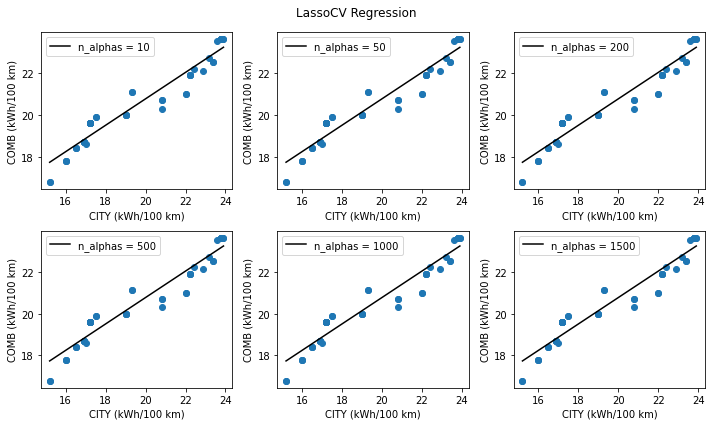

In [44]:
nalpha = [10, 50, 200, 500, 1000, 1500]
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.ravel()
for i, j in zip(nalpha, range(0, len(nalpha))): 
    lcv = LassoCV(n_alphas=i, normalize=False, fit_intercept=True)
    lcv.fit(x, y)
    axs[j].scatter(x,y)
    axs[j].plot(X_seq,lcv.predict(X_seq), c = 'black', label = 'n_alphas = %s' %(i))
    axs[j].set_xlabel(x_col)
    axs[j].set_ylabel(y_col)
    axs[j].legend()
fig.suptitle('LassoCV Regression')
fig.tight_layout()

We see that there is no difference between different counts of alphas. 

# Conclusion

I presented different regression analysis for the same data. We see that Polynomial regression fits perfectly, but data is perfect for a simple Linear regression. I hope the reader can learn something from it and finds it useful :)